In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [9]:
iris=datasets.load_iris()
X=iris.data[:100,:2]
y=iris.target[:100]

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
svm_clf=SVC(kernel='linear',C=1.0)

In [15]:
svm_clf.fit(X_train,y_train)

SVC(kernel='linear')

In [17]:
y_pred=svm_clf.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

Accuracy:  1.0


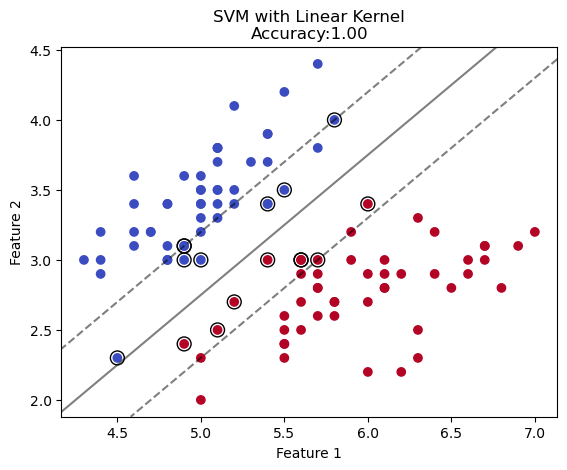

In [21]:
#Graph
plt.scatter(X[:,0],X[:,1],c=y,cmap='coolwarm')

#Boundary Line
ax=plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
XX,yy=np.meshgrid(np.linspace(xlim[0],xlim[1],50),
                 np.linspace(ylim[0],ylim[1],50))
Z=svm_clf.decision_function(np.c_[XX.ravel(), yy.ravel()])
Z=Z.reshape(XX.shape)

#Plot
plt.contour(XX,yy,Z,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
plt.scatter(svm_clf.support_vectors_[:,0],svm_clf.support_vectors_[:,1],s=100,linewidth=1,facecolors='none',edgecolors='k')
plt.title(f'SVM with Linear Kernel\nAccuracy:{accuracy:.2f}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()